In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as smf
from scipy.stats import norm
import scipy.stats as stat
from datetime import datetime

collecte de données :
  - renvoie les returns
  - renvoie les cours des actifs

In [2]:
 # retourne le rendement des actifs
def data_returns(tickers,date1,date2):
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"].pct_change()).dropna())
    return returns

In [3]:
#Retourne le cours journalier des actifs
def data_(tickers,date1,date2):  
    returns=pd.DataFrame()
    for i in range(len(tickers)):
        data=yf.download(tickers[i],date1,date2)
        returns[tickers[i]]=((data["Adj Close"]).dropna())
       
    return returns

Donne la pondération pour un portefeuille composé de n actifs

In [4]:
#Simule aléatoirement les pondérations de n actifs
def Pond(n):
    W=np.random.randint(1,10,n)  # Generation de n entiers compris entre 1 et 10
    W= W/np.sum(W) #  Normalisation pour aoir la somme de spondérations égale à 1
    return W


la rentabilité trimestriel de chaque actif

In [5]:
#la rentabilité trimestriel de chaque actif
def Rentabilité(resultat):
    mu=pd.DataFrame(["mean"])
    for i in range(np.shape(resultat)[1]):
        mu[resultat.columns[i]]= (1+np.mean(resultat.iloc[:,i]))**63-1
    return mu

#matrice de variance covariance trimestrielle
def Matcov(resultat):
    sigma= resultat.cov()* np.sqrt(63)
    return sigma



 la matrice de variance covariance trimestrielle des différents actifs

In [6]:
#matrice de variance covariance trimestrielle
def Matcov(resultat):
    sigma= resultat.cov()* np.sqrt(63)
    return sigma

#la rentabilité et la variance des différents portefeuilles simulés
def PortfolioStat(data, sim=100000):
    resultat= data
    mu= resultat.mean() #  Rentabilité des actifs
    sigma= Matcov(resultat)  # Matrice de variance covariance des différents  actifs
    n= data.shape[1]
    W=np.zeros((sim,n))
    moy=np.zeros(sim)
    theta=np.zeros(sim)
    for i in range(sim):
        wi= Pond(n) # POndération de chaque portefeuille
        moy[i]= np.dot(wi,mu)   # Rentabilité espérée du portefeuille
        theta[i]  = np.dot(wi.T,np.dot(sigma, wi))   #Volatilité de chaque portefeuille
        W[i]= wi   # incrémenter au fur et à mesure une matrice des pondérations
         # incrémentation des moyennes
         # incrémentations des variances
    results= list()    #liste qui contiendra la matrice des pondérations, le vecteur rentabilité, et le vecteur variance pour chaque simulation
    results.append(W) 
    results.append(moy)
    results.append(theta)
    plt.scatter(results[2],results[1])

    return results

la rentabilité et la variance des différents portefeuilles simulés

In [7]:
#la rentabilité et la variance des différents portefeuilles simulés
def PortfolioStat(data, sim=100000):
    resultat= data
    mu= resultat.mean() #  Rentabilité des actifs
    sigma= Matcov(resultat)  # Matrice de variance covariance des différents  actifs
    n= data.shape[1]
    W=np.zeros((sim,n))
    moy=np.zeros(sim)
    theta=np.zeros(sim)
    for i in range(sim):
        wi= Pond(n) # POndération de chaque portefeuille
        moy[i]= np.dot(wi,mu)   # Rentabilité espérée du portefeuille
        theta[i]  = np.dot(wi.T,np.dot(sigma, wi))   #Volatilité de chaque portefeuille
        W[i]= wi   # incrémenter au fur et à mesure une matrice des pondérations
         # incrémentation des moyennes
         # incrémentations des variances
    results= list()    #liste qui contiendra la matrice des pondérations, le vecteur rentabilité, et le vecteur variance pour chaque simulation
    results.append(W) 
    results.append(moy)
    results.append(theta)
    plt.scatter(results[2],results[1])
    return results

#Global minimum Variance
def GMV(portfolio):
      min_ = min(portfolio[2])
      index= np.where(portfolio[2]==min_)
      return [portfolio[0][index],portfolio[1][index],portfolio[2][index]]

#beta
def beta(Rm,Rp):
  x=Rm.to_numpy().T
  y=Rp.to_numpy().T
  covariance = np.abs( np.cov(x, y)[0][1])
 # Calcul de la variance de x
  variance_x = np.var(x)
  return covariance/variance_x

#le treynor
def treynor(Rp, Rm,rf):
    return (np.mean(Rp-rf))/beta(Rm,Rp)
# ALpha Jensen
def alphaJensen(Rp, Rm,rf):
    return np.mean(Rp)-(rf + beta(Rm,Rp)*(Rm.mean().iloc[0]-rf))

#ratio de sharpe
def SharpeRate(r,sigma, rf):
    return ((r-rf)/sigma)




Global minimum Variance

In [8]:
#Global minimum Variance
def GMV(portfolio):
      min_ = min(portfolio[2])
      index= np.where(portfolio[2]==min_)
      return [portfolio[0][index],portfolio[1][index],portfolio[2][index]]

Renvoie la pondération, la rentabilité et la volatilié qui maximise le ratio de Sharpe

In [9]:
#Renvoie la pondération, la rentabilité et la volatilié qui maximise le ratio de Sharpe
def MaxSharpeRate(portfolio, rf):
    max_= max((portfolio[1]-rf)/portfolio[2])
    index=np.where(((portfolio[1]-rf)/portfolio[2])==max_)
    return  [portfolio[0][index],portfolio[1][index],portfolio[2][index],max_]

Le beta

In [10]:
def beta(Rm,Rp):
    data=pd.DataFrame(Rp,columns=["Rp"])
    data[["Rm"]]=Rm

    return (data.cov().iloc[1,0]/np.var(data[["Rm"]])).iloc[0]
#beta
def beta(Rm,Rp):
  x=Rm.to_numpy().T
  y=Rp.to_numpy().T
  covariance = np.abs( np.cov(x, y)[0][1])
 # Calcul de la variance de x
  variance_x = np.var(x)
  return covariance/variance_x

rp =beta(rm-rf) +rf 

In [11]:
def Rp(data, weight):
    return data.dot(weight).pct_change().dropna()
#pd.DataFrame({"Rp":np.dot(data,weight.T)}).pct_change().dropna()

les Ratios:
  - le treynor
  - ALpha Jensen
  - ratio de sharpe

In [12]:
#le treynor
def treynor(Rp, Rm,rf):
    return (np.mean(Rp-rf))/beta(Rm,Rp)
# ALpha Jensen
def alphaJensen(Rp, Rm,rf):
    return np.mean(Rp)-(rf + beta(Rm,Rp)*(Rm.mean().iloc[0]-rf))

#ratio de sharpe
def SharpeRate(r,sigma, rf):
    return ((r-rf)/sigma)


In [13]:
start_date= '2023-01-01'
end_date="2023-04-01"
tickers=tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA", "^IXIC", "^TNX"]
Rm=data_returns(["^GSPC"],start_date,end_date)
tada=data_(tickers,start_date,end_date)
tada_return=data_returns(tickers,start_date,end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [33]:
start_date= '2022-04-01'
end_date="2023-04-01"
tickers=["GOOGL", "MSFT", "GC=F", "TSLA",'AAPL', "BABA", "^IXIC", "^TNX"]
rm=data_returns(["^SP500-40"],start_date, datetime.today().strftime('%Y-%m-%d'))
tick=["NMIH",  "MKTX",'CRVL',"FANH","TW",'SNEX', " HGBL"]
raw_data= data_returns(tick,start_date,datetime.today().strftime('%Y-%m-%d')) 


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
def var_historic(data,weight,level): 
    intialvalue=np.dot(data.iloc[0,:],weight.T) 
    returns= data.pct_change().dropna()
    portfolio=  pd.DataFrame(np.dot(returns, weight.T) ) 
    
    return (np.percentile(portfolio, level))*intialvalue*np.sqrt(63)

def cvar_historic(data,weight,level):
    intialvalue=np.dot(data.iloc[0,:],weight.T)
    returns= data.pct_change().dropna()
    portfolio=  pd.DataFrame(np.dot(returns, weight.T) )#.sort_values(by=0)
    var=np.percentile(portfolio, level)
    cvar=portfolio[portfolio<= var].mean()
    return (cvar)*intialvalue*np.sqrt(len(data))

def treynor(Rp, Rm,rf):
    return (np.mean(Rp-rf))/beta(Rm,Rp)

def alphaJensen(Rp, Rm,rf):
    return np.mean(Rp)-(rf + beta(Rm,Rp)*(Rm.mean().iloc[0]-rf))

def SharpeRate(r, rf):
    return ((np.mean(r)-rf)/np.std(r))

raw_data=raw_data.drop(raw_data.index[-1])
rm=rm.drop(rm.index[-1])
beta(rm,rm)


nan

In [16]:
beta(data_returns(["GOOGL"],start_date, datetime.today().strftime('%Y-%m-%d')),data_returns(["^SP500-40"],start_date, datetime.today().strftime('%Y-%m-%d')))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


nan

[array([[0.04166667, 0.04166667, 0.29166667, 0.04166667, 0.33333333,
        0.04166667, 0.125     , 0.08333333]]), array([0.00299453]), array([0.00070237]), 2.83971879689606]


[array([[0.03846154, 0.07692308, 0.34615385, 0.07692308, 0.11538462,
         0.03846154, 0.03846154, 0.26923077]]),
 array([0.00211133]),
 array([0.00054463])]

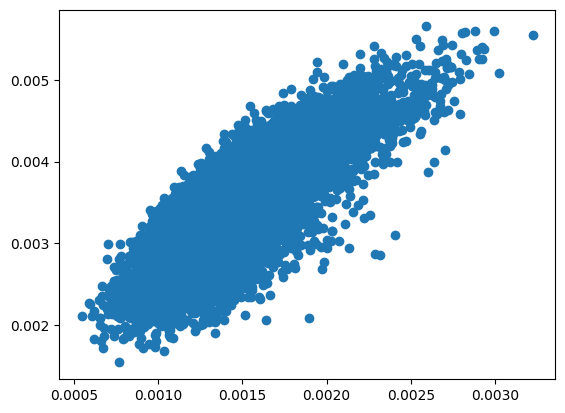

In [17]:
portfolio=PortfolioStat(tada_return,10000)
rf=0.001
print(MaxSharpeRate(portfolio, rf))
GMV(portfolio)

In [18]:
R_p=Rp(tada,np.array([0.0625, 0.125 , 0.125 , 0.0625, 0.0625, 0.5625]))
print(beta(Rm,R_p))
print(treynor(R_p,Rm,0.01))
print(alphaJensen(R_p,Rm,0.01))


ValueError: Dot product shape mismatch, (62, 8) vs (6,)

In [19]:
def beta_fit(Rp,Rm):

    data=pd.DataFrame(Rp,columns=["Rp"])
    data[["Rm"]]=Rm

    Rm = smf.add_constant(Rm)
    model= smf.OLS(Rp,Rm)
    fit=model.fit()
    return fit

beta_fit(R_p,Rm).summary()


NameError: name 'R_p' is not defined

In [ ]:
def beta_fit(Rp,Rm):

    Rm = smf.add_constant(Rm)
    model= smf.OLS(Rp,Rm)
    fit=model.fit()
    return fit

beta_fit(R_p,Rm).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     186.5
Date:                Fri, 28 Apr 2023   Prob (F-statistic):           1.52e-33
Time:                        15:21:06   Log-Likelihood:                 1012.9
No. Observations:                 311   AIC:                            -2022.
Df Residuals:                     309   BIC:                            -2014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.393      0.695      -0.001       0.001
^GSPC          0.5018      0.037     13.656      0.000       0.429       0.574
==============================================================================
Omnibus:                       10.027   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.832
Skew:                           0.312   Prob(JB):                      0.00270
Kurtosis:                       3.723   Cond. No.                         69.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
dfs = pd.read_excel('CPI_data.xlsx')

df=dfs.to_numpy().T[0]
df = np.random.choice(df, size=311)
df=pd.DataFrame(df).to_numpy()
dfs

,CPI
0,7.500000
1,6.414207
2,6.474479
3,6.160573
4,6.021537
5,5.916943
6,5.910885
7,6.322203
8,6.630604
9,6.284422


In [ ]:
beta_fit(R_p,df).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.594
Date:                Fri, 28 Apr 2023   Prob (F-statistic):             0.0589
Time:                        16:26:13   Log-Likelihood:                 941.27
No. Observations:                 311   AIC:                            -1879.
Df Residuals:                     309   BIC:                            -1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      0.008      1.887      0.060      -0.001       0.030
x1            -0.0023      0.001     -1.896      0.059      -0.005    8.93e-05
==============================================================================
Omnibus:                        4.899   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                5.466
Skew:                           0.164   Prob(JB):                       0.0650
Kurtosis:                       3.560   Cond. No.                         73.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
def monthly_return(data):
 data=data+1
 return data.groupby(pd.Grouper(freq='M')).prod()-1

monthly_return()

,NMIH,MKTX,CRVL,FANH,TW,SNEX,HGBL
Date,,,,,,,
2022-04-30,-0.102101,-0.223397,-0.108069,-0.154477,-0.197859,-0.102371,-0.189394
2022-05-31,0.012514,0.071417,-0.038174,-0.156250,-0.049184,0.107554,0.112150
2022-06-30,-0.105320,-0.091132,-0.012671,0.007797,0.009466,0.039963,0.260504
2022-07-31,0.137538,0.057693,0.119644,0.019342,0.033260,0.116050,0.093333
2022-08-31,0.083949,-0.079557,-0.057675,0.058824,-0.012036,0.065534,0.006098
2022-09-30,-0.007793,-0.104992,-0.109087,-0.100358,-0.189251,-0.106635,-0.024242
2022-10-31,0.076583,0.096858,0.186231,-0.037849,-0.023750,0.125151,0.118012
2022-11-30,-0.018240,0.101011,-0.068449,-0.043478,0.117359,0.087334,0.333333
2022-12-31,-0.029262,0.040945,-0.049944,0.601732,0.056459,-0.060806,-0.020833


In [37]:
R_pm=monthly_return(raw_data).dot(np.array([0.0625, 0.0625, 0.3125, 0.0625, 0.375 , 0.0625, 0.0625]))
Rm=monthly_return(rm)
R_pm


Date
2022-04-30   -0.156203
2022-05-31   -0.021162
2022-06-30    0.006578
2022-07-31    0.076358
2022-08-31   -0.014109
2022-09-30   -0.126560
2022-10-31    0.072963
2022-11-30    0.051367
2022-12-31    0.038801
2023-01-31    0.157990
2023-02-28   -0.013015
2023-03-31    0.086564
2023-04-30   -0.036172
2023-05-31   -0.032623
2023-06-30    0.007799
Freq: M, dtype: float64

In [38]:

def create_csv(data):
    return data.to_csv("dt02.csv", sep='\t')
create_csv(Rm)

#beta_fit(R_pm,Rm).summary()


In [ ]:
#Rm[["Rp"]]=R_p.to_numpy()
#Rm[["CPI"]]=df.to_numpy()
R_p

Date
2022-01-04   -0.001506
2022-01-05   -0.003502
2022-01-06   -0.006333
2022-01-07    0.005398
2022-01-10    0.000286
                ...   
2023-03-24   -0.002563
2023-03-27   -0.013594
2023-03-28    0.025248
2023-03-29    0.003399
2023-03-30    0.011817
Length: 311, dtype: float64

Test de Jacque-bera - test milk shapiro
determination de la distribution
scindé les portfeuilles